In [14]:
import torch
import sys
sys.path.append('../')
import numpy as np
from utils.model_loader import create_model
import matplotlib.pyplot as plt


In [15]:
class args_class(object):
    def __init__(self,batch_size,seq_input,seq_output):
        self.batch_size = batch_size
        self.seq_start  = seq_input
        self.seq_output = seq_output 
        self.seq_length = seq_input + seq_output
        self.image_height = 100
        self.use_gpu = False

In [16]:
def load_pytorch_model_to_cpu(model,PARAMS_PATH):
    network = torch.load(PARAMS_PATH,map_location='cpu')['network']
    from collections import OrderedDict
    new_state_dict = OrderedDict()
    for key,value in network.items():
        name = key[6:]
        new_state_dict[name] = value

    model.load_state_dict(new_state_dict)
    model.eval()
    return model

## Specs

In [4]:
# RESULTS_PATH = "/home/nick/Desktop/experiments_results/"
# TEST_SET_PATH = "/home/nick/Desktop/experiments_results/milan_processed_test.npz"
RESULTS_PATH  = '/afs/inf.ed.ac.uk/user/s18/s1818503/Desktop/experiments_results/'
TEST_SET_PATH = '/afs/inf.ed.ac.uk/user/s18/s1818503/Desktop/experiments_results/milan_processed_test.npz'
RESULT_FOLDERS = {
#     'no_scaling' : "conv_lstm_results_before_scaling_i=5_o=15/",
#     'standard'   : "conv_lstm_with_data_standardisation_i=5_o=15/"
    'deepconvlstm' :  'hzzone_conv_lstm/' ,
    'shallowconvlstm' :  'cxiixi_conv_lstm/'
}

In [17]:
experiment_name = 'conv_lstm_lr_-3'
device='cpu'
args  =  args_class(10 ,12, 6)
model_name = 'shallowconvlstm'

In [18]:
PARAMS_PATH = RESULTS_PATH + RESULT_FOLDERS[model_name] + experiment_name + '/saved_models/train_model_latest'
model = create_model(model_name,args,device)
model = load_pytorch_model_to_cpu(model,PARAMS_PATH)

test_data = np.load(TEST_SET_PATH)
x = test_data['x'].transpose(0,3,1,2).astype(np.float32)
y = test_data['y'].transpose(0,3,1,2).astype(np.float32)

In [7]:
from torch.utils.data import DataLoader
import utils.dataloaders as dataloaders
torch.manual_seed(seed=1)
test_dataset  = dataloaders.MilanDataLoader(_set = 'test', toy = False, DATA_DIR=TEST_SET_PATH)
test_data = DataLoader(test_dataset,batch_size=args.batch_size,shuffle=True,num_workers=4,drop_last = True)

## Sample predictions

In [8]:
x,y = next(iter(test_data))

In [9]:
y.shape

torch.Size([10, 6, 100, 100])

In [19]:
out = model.forward(x)

/afs/inf.ed.ac.uk/user/s18/s1818503/miniconda3/envs/mlp/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/afs/inf.ed.ac.uk/user/s18/s1818503/miniconda3/envs/mlp/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [20]:
out = out.detach().numpy()

In [21]:
from matplotlib.colors import Normalize
norm = Normalize(vmin=-0.42,vmax=50)

#### Vis

In [22]:
import os
PREDICTIONS_PATH = RESULTS_PATH + RESULT_FOLDERS[model_name] + experiment_name + '/example_predictions/'
colormap = 'nipy_spectral'
if not os.path.isdir(PREDICTIONS_PATH):
    os.mkdir(PREDICTIONS_PATH)
for i in range(y.shape[0]):
    EXAMPLE_PATH = PREDICTIONS_PATH + 'example_' + str(i) 
    if not os.path.isdir(EXAMPLE_PATH):
        os.mkdir(EXAMPLE_PATH)
    for j in range(y.shape[1]):
        
        plt.figure()
        plt.suptitle('timestep: ' + str(j),fontsize=16)

        plt.subplot(1,2,1)

        plt.imshow(y[i,j,...],origin='lower',norm=norm,cmap=colormap)
        plt.title('ground_truth',fontsize=16)
        plt.xlabel('x coordinate',fontsize=16)
        plt.ylabel('y coordinate',fontsize=16)

        plt.subplot(1,2,2)

        plt.imshow(out[i,j,...],origin='lower',norm=norm,cmap=colormap)
        plt.title('prediction',fontsize=16)
        plt.xlabel('x coordinate',fontsize=16)
        # plt.ylabel('y coordinate',fontsize=16)
        plt.subplots_adjust(wspace=0.3)
        fig_name = 'timestep_' + str(j) + '.pdf'
#         plt.colorbar()
        plt.savefig(os.path.join(EXAMPLE_PATH,fig_name))
        plt.clf()
    
    fig,ax =plt.subplots(2,y.shape[1])
    for j in range(y.shape[1]):
        
        fig.suptitle('entire sequence',fontsize=16)
        ax[0,j].imshow(y[i,j,...],origin='lower',norm=norm,cmap=colormap)
        ax[0,j].axis('off')
#         plt.title('ground_truth',fontsize=16)
#         plt.xlabel('x coordinate',fontsize=16)
#         plt.ylabel('y coordinate',fontsize=16)
        ax[1,j].imshow(out[i,j,...],origin='lower',norm=norm,cmap=colormap)
        ax[1,j].axis('off')

#         plt.title('prediction',fontsize=16)
#         plt.xlabel('x coordinate',fontsize=16)
        # plt.ylabel('y coordinate',fontsize=16)
        plt.subplots_adjust(hspace =-.5)
#     fig.text(0.2,0.2,'ground_truth')
#     ax[0,0].set_ylabel('ground_truth',fontsize=16)
#     ax[1,0].set_ylabel('prediction',fontsize=16)

    fig_name = 'entire_sequence' + '.pdf'    
    plt.savefig(os.path.join(EXAMPLE_PATH,fig_name))
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## SSIM

In [ ]:
from skimage import measure 
def ssim(self, predicted, target):
        # print(predicted.size)
        multichannel = self.num_channels > 1
        return measure.compare_ssim(predicted, target, multichannel=multichannel, gaussian_weights=True)


## MSE against Prediction TimeStep

In [23]:
se_batch = torch.sum((out.squeeze() - y)**2,(2,3))
mse_frame_timestep = torch.mean(se_batch,0) 

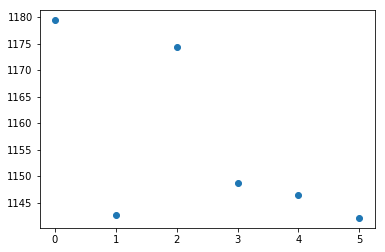

In [24]:
plt.plot(mse_frame_timestep.detach().numpy(),'o')

In [27]:
test_data.batch_size
for x,y in test_data:
    out = model.forward(x)
    se_batch = torch.sum((out.squeeze() - y)**2,(2,3))
    mse_frame_timestep = torch.mean(se,0) 
    

/afs/inf.ed.ac.uk/user/s18/s1818503/miniconda3/envs/mlp/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/afs/inf.ed.ac.uk/user/s18/s1818503/miniconda3/envs/mlp/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
Process Process-7:
Process Process-8:
Process Process-5:
Process Process-6:


KeyboardInterrupt: 

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/afs/inf.ed.ac.uk/user/s18/s1818503/miniconda3/envs/mlp/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/afs/inf.ed.ac.uk/user/s18/s1818503/miniconda3/envs/mlp/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/afs/inf.ed.ac.uk/user/s18/s1818503/miniconda3/envs/mlp/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/afs/inf.ed.ac.uk/user/s18/s1818503/miniconda3/envs/mlp/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/afs/inf.ed.ac.uk/user/s18/s1818503/miniconda3/envs/mlp/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/afs/inf.ed.ac.uk/user/s18/s1818503/miniconda3/envs/mlp/lib/python3.6/multiprocessing/process.py", 

In [29]:
test_data.batch_size
test_data.batch_sampler


In [9]:
torch.zeros(1)

tensor([0.])

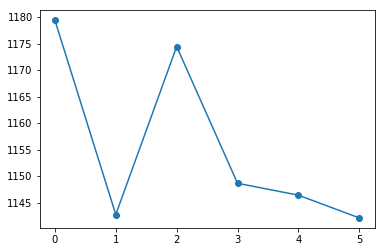

In [27]:
fig = plt.figure()
plt.plot(mse_frame_timestep.detach().numpy(),'-o')
plt.savefig('1.pdf')